# Healthcare-PGP

Problem Statement:

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

# Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

# Project Task 1:#Data Exploration

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [10]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [11]:
data=pd.read_csv('health care diabetes.csv')
data.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
#Checking for null values:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Descriptive Analysis:

A descriptive analysis is an important first step for conducting statistical analyses. It gives you an idea of the distribution of your data, helps you detect outliers and typos, and enable you identify associations among variables, thus making you ready to conduct further statistical analyses

In [13]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Variation in variables can be found in below table:

In [15]:
print("standard deviation of each variable:")
data.apply(np.std)

standard deviation of each variable:


Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

Valuable insights from descriptive analysis:
There are 768 observations of 9 variables
Average age of patients:33.24
Average value of pregnancies:3.84
Average value of Glucose:120.89
Average value of BloodPressure:69.10
Average value of SkinThickness:20.53
Average value of Insulin:79.79
Average value of BMI:31.99
Average value of DPF:0.47

As in the problem statement it was mentioned value 0 indicates missing values and to treat accordingly

Visualizing Glucose,BloodPressure,SkinThickness,Insulin,BMI using histogram by median

Treating missing values and analysizing distribution of data

Median of Glucose level is: 117.0
Datatype of Glucose variable is: int64


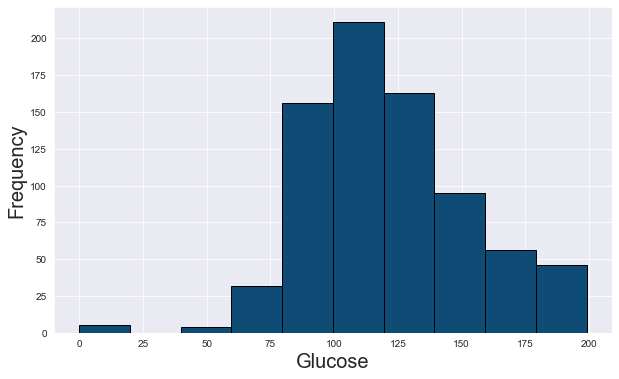

In [17]:
data['Glucose'].plot.hist(bins=10,color='#0f4c75',edgecolor='black')
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
print("Median of Glucose level is:",data['Glucose'].median())
print("Datatype of Glucose variable is:",data['Glucose'].dtypes)
sns.set_style('darkgrid')

Treating missing values which is basically 0 by median of Glucose level. This is because we can see from histogram most of observation have Glucose level between 100 and 120.Now replacing 0 with median by below syntax

In [18]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())

In [19]:
data['Glucose'].head(n=10)

0    148
1     85
2    183
3     89
4    137
5    116
6     78
7    115
8    197
9    125
Name: Glucose, dtype: int64

Now repeating the same steps for BP,ST,Insulin and BMI

Median of BloodPressure is: 72.0
Datatype of BloodPressure variable is: int64


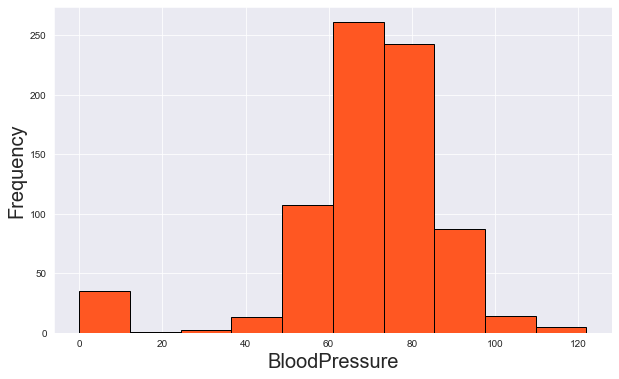

In [20]:
#BloodPressure
data['BloodPressure'].plot.hist(bins=10,color='#ff5722',edgecolor='black')
plt.xlabel('BloodPressure',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
print("Median of BloodPressure is:",data['BloodPressure'].median())
print("Datatype of BloodPressure variable is:",data['BloodPressure'].dtypes)
sns.set_style('darkgrid')

Treating missing values which is basically 0 by median of BloodPressure level. This is because we can see from histogram most of observation have BP level between 70 and 80.Now replacing 0 with median by below syntax

In [21]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())

In [22]:
data['BloodPressure'].head(n=10)

0    72
1    66
2    64
3    66
4    40
5    74
6    50
7    72
8    70
9    96
Name: BloodPressure, dtype: int64

Median of SkinThickness is: 23.0
Datatype of SkinThickness variable is: int64


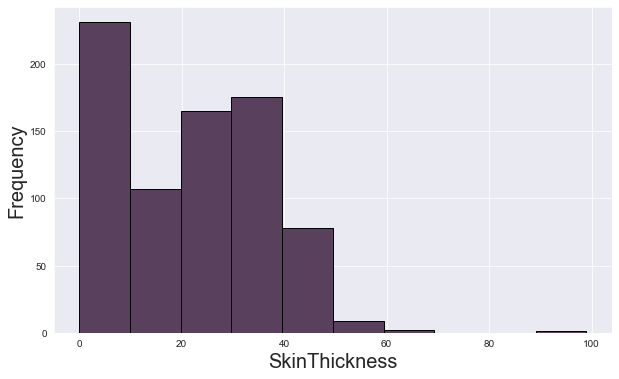

In [23]:
#SkinThickness
data['SkinThickness'].plot.hist(bins=10,color='#59405c',edgecolor='black')
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
print("Median of SkinThickness is:",data['SkinThickness'].median())
print("Datatype of SkinThickness variable is:",data['SkinThickness'].dtypes)
sns.set_style('darkgrid')

Treating missing values which is basically 0 by median of SkinThickness. This is because we can see from histogram most of observation have SkinThickness between 20 and 30.Now replacing 0 with median by below syntax

In [24]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())

In [25]:
data['SkinThickness'].head(n=10)

0    35
1    29
2    23
3    23
4    35
5    23
6    32
7    23
8    45
9    23
Name: SkinThickness, dtype: int64

Median of Insulin is: 30.5
Datatype of Insulin variable is: int64


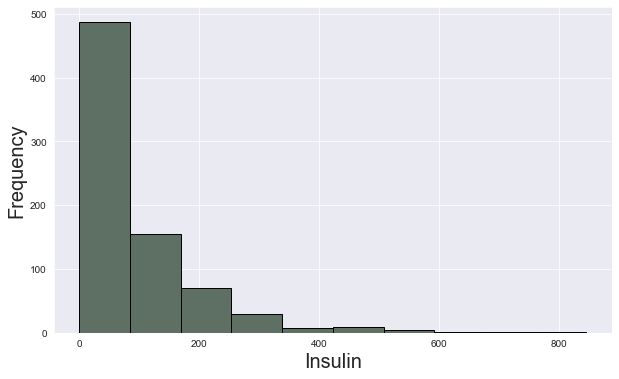

In [26]:
#Insulin
data['Insulin'].plot.hist(bins=10,color='#5e6f64',edgecolor='black')
plt.xlabel('Insulin',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
print("Median of Insulin is:",data['Insulin'].median())
print("Datatype of Insulin variable is:",data['Insulin'].dtypes)
sns.set_style('darkgrid')

Treating missing values which is basically 0 by median of Insulin. This is because we can see from histogram most of observation have SkinThickness between 0 and 200.Now replacing 0 with median by below syntax

In [27]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())

In [28]:
data['Insulin'].head(n=10)

0     30.5
1     30.5
2     30.5
3     94.0
4    168.0
5     30.5
6     88.0
7     30.5
8    543.0
9     30.5
Name: Insulin, dtype: float64

Median of BMI is: 32.0
Datatype of BMI variable is: float64


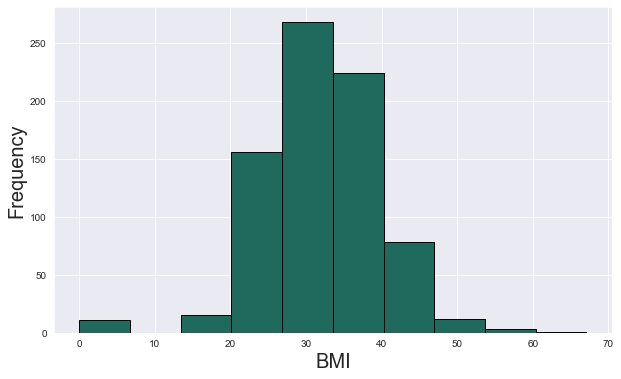

In [29]:
#BMI
data['BMI'].plot.hist(bins=10,color='#206a5d',edgecolor='black')
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,6)
print("Median of BMI is:",data['BMI'].median())
print("Datatype of BMI variable is:",data['BMI'].dtypes)
sns.set_style('darkgrid')

Treating missing values which is basically 0 by median of BMI. This is because we can see from histogram most of observation have SkinThickness between 25 and 45.Now replacing 0 with median by below syntax

In [30]:
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

In [31]:
data['BMI'].head(n=10)

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
5    25.6
6    31.0
7    35.3
8    30.5
9    32.0
Name: BMI, dtype: float64

After substituting 0 with median,rechecking the values. As shown in the below table 0 replaced with median

In [32]:
data.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [33]:
data.tail(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,23,30.5,37.5,0.197,26,0
759,6,190,92,23,30.5,35.5,0.278,66,1
760,2,88,58,26,16.0,28.4,0.766,22,0
761,9,170,74,31,30.5,44.0,0.403,43,1
762,9,89,62,23,30.5,22.5,0.142,33,0
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
767,1,93,70,31,30.5,30.4,0.315,23,0


# Creating a Count frequency plot for describing the data types and count of variables

In [34]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [35]:
data.dtypes.value_counts()

int64      6
float64    3
dtype: int64

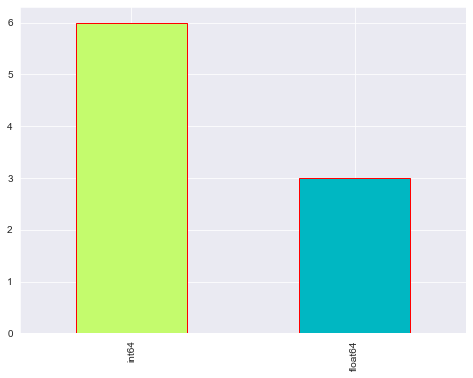

In [36]:
fig=plt.gcf()
fig.set_size_inches(8,6)
data.dtypes.value_counts().plot(kind='bar',color=['#c4fb6d','#00b7c2'],edgecolor='red')
plt.show()

# Project Task 2:#Data Exploration

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


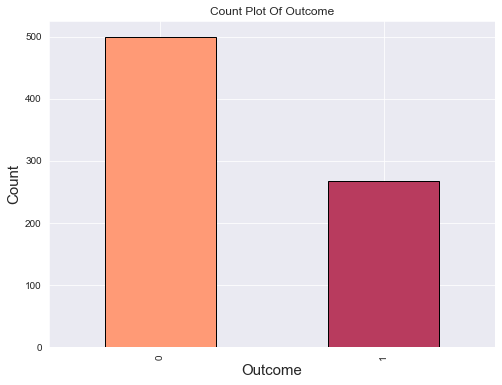

In [37]:
plt.title("Count Plot Of Outcome")
plt.xlabel("Outcome",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.set_style("darkgrid")
fig=plt.gcf()
fig.set_size_inches(8,6)
print("Count of class is:\n",data['Outcome'].value_counts())
ax=data['Outcome'].value_counts().plot(kind='bar',edgecolor='black',color=['#ff9a76','#b83b5e'])

# Correlation Analysis: Performing correlation analysis. Visually explorring it using a heat map.

In [38]:
#Creating a correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


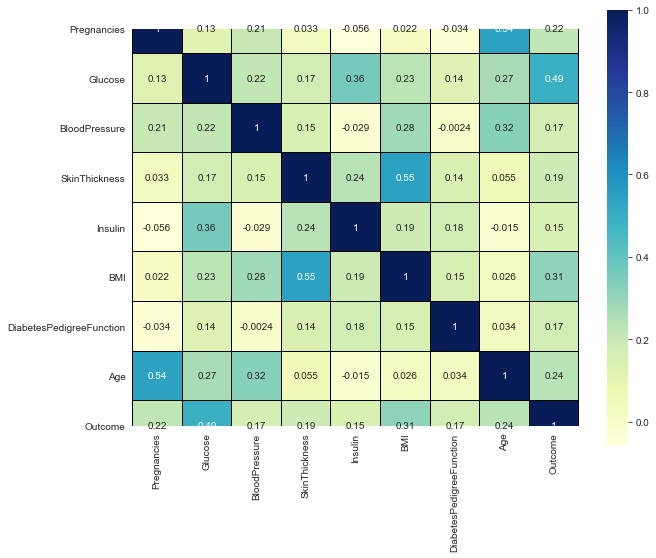

In [39]:
#Heat map
fig=plt.gcf()
fig.set_size_inches(10,8)
fig=sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidths=0.1,linecolor='black',square=True,cbar_kws={"orientation": "vertical"},cbar=True)

From the above heat map top correlations will be: 1)SkinThickness vs BMI=0.55
                                                  2)Pregnancies vs Age=0.54
                                                  3)Glucose vs Insulin=0.36
                                                  4)BloodPressure vs Age=0.32
                                                  5)BMI vs BloodPressure=0.28

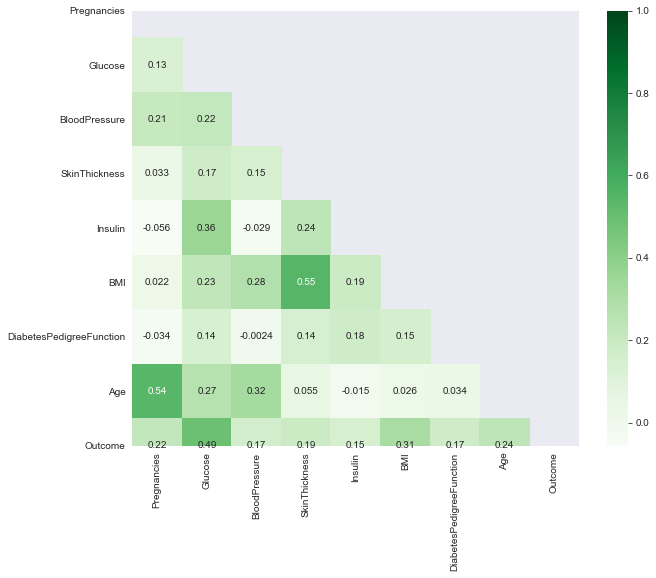

In [40]:
#Upper triangle
fig=plt.gcf()
fig.set_size_inches(10,8)
matrix=np.triu(data.corr())
ax=sns.heatmap(data.corr(),annot=True,mask=matrix,cmap='Greens')

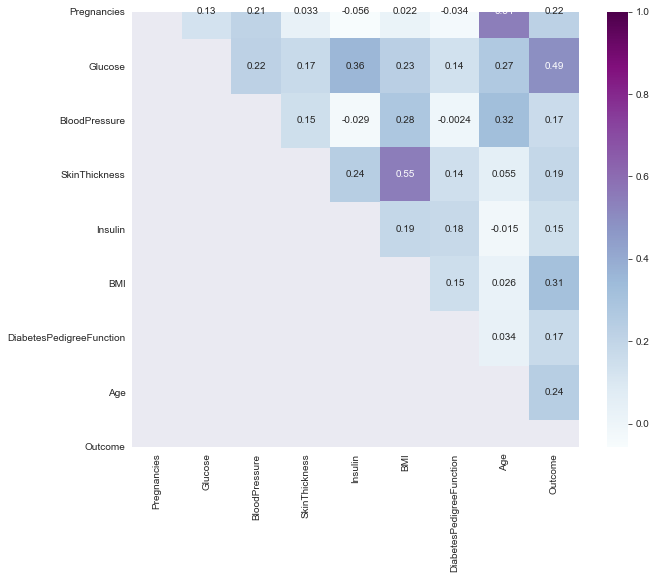

In [41]:
#Lower triangle
fig=plt.gcf()
fig.set_size_inches(10,8)
mask = np.tril(data.corr())
ax=sns.heatmap(data.corr(), annot=True, mask=mask,cmap='BuPu')

# Creating a scatter plots between the pair of variables to understand the relationships among the top correlation values:
                                                  1)SkinThickness vs BMI=0.55
                                                  2)Pregnancies vs Age=0.54
                                                  3)Glucose vs Insulin=0.36
                                                  4)BloodPressure vs Age=0.32
                                                  5)BMI vs BloodPressure=0.28
    

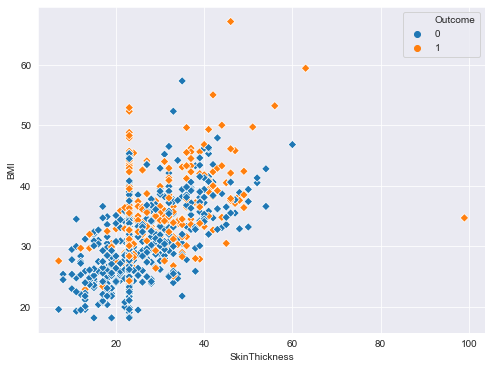

In [42]:
#SkinThickness Vs BMI
fig=plt.gcf()
fig.set_size_inches(8,6)
ax=sns.scatterplot(x='SkinThickness',y='BMI',data=data,hue='Outcome',marker='D')

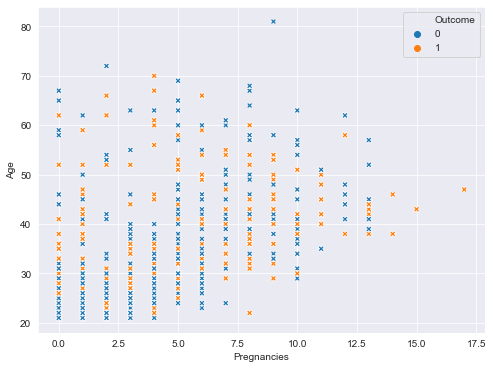

In [43]:
#Pregnancies Vs Age
fig=plt.gcf()
fig.set_size_inches(8,6)
ax=sns.scatterplot(x='Pregnancies',y='Age',data=data,hue='Outcome',marker='X')

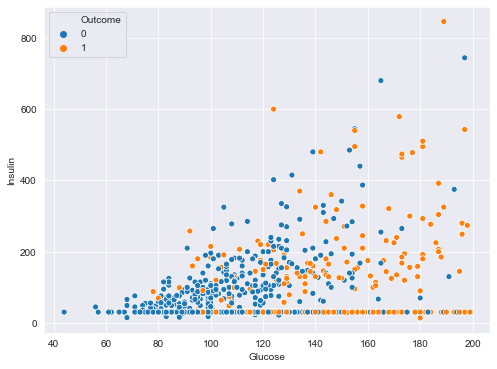

In [44]:
#Glucose Vs Insulin
fig=plt.gcf()
fig.set_size_inches(8,6)
ax=sns.scatterplot(x='Glucose',y='Insulin',data=data,hue='Outcome',marker='o')

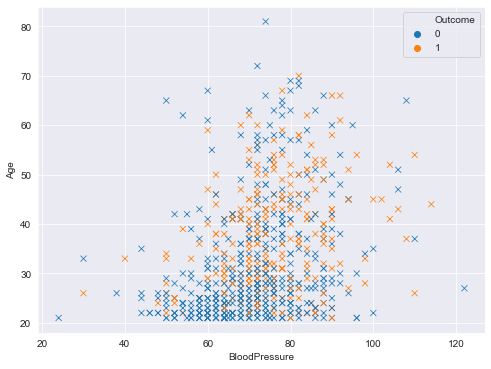

In [45]:
#BloodPressure Vs Age
fig=plt.gcf()
fig.set_size_inches(8,6)
ax=sns.scatterplot(x='BloodPressure',y='Age',data=data,hue='Outcome',marker='x')

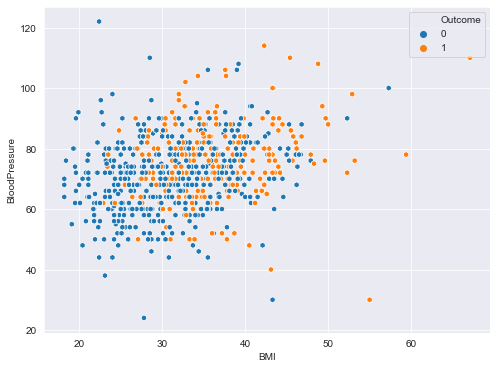

In [46]:
#BMI Vs BloodPressure
fig=plt.gcf()
fig.set_size_inches(8,6)
ax=sns.scatterplot(x='BMI',y='BloodPressure',data=data,hue='Outcome',marker='h')

Thus from the above scatter plots we can see the relationships between the pair of variables..Lets visualise using a pairplot for skinthickness,bmi,pregnancies,age,glucose,insulin,bloodpressure,DiabetesPedigreeFunction

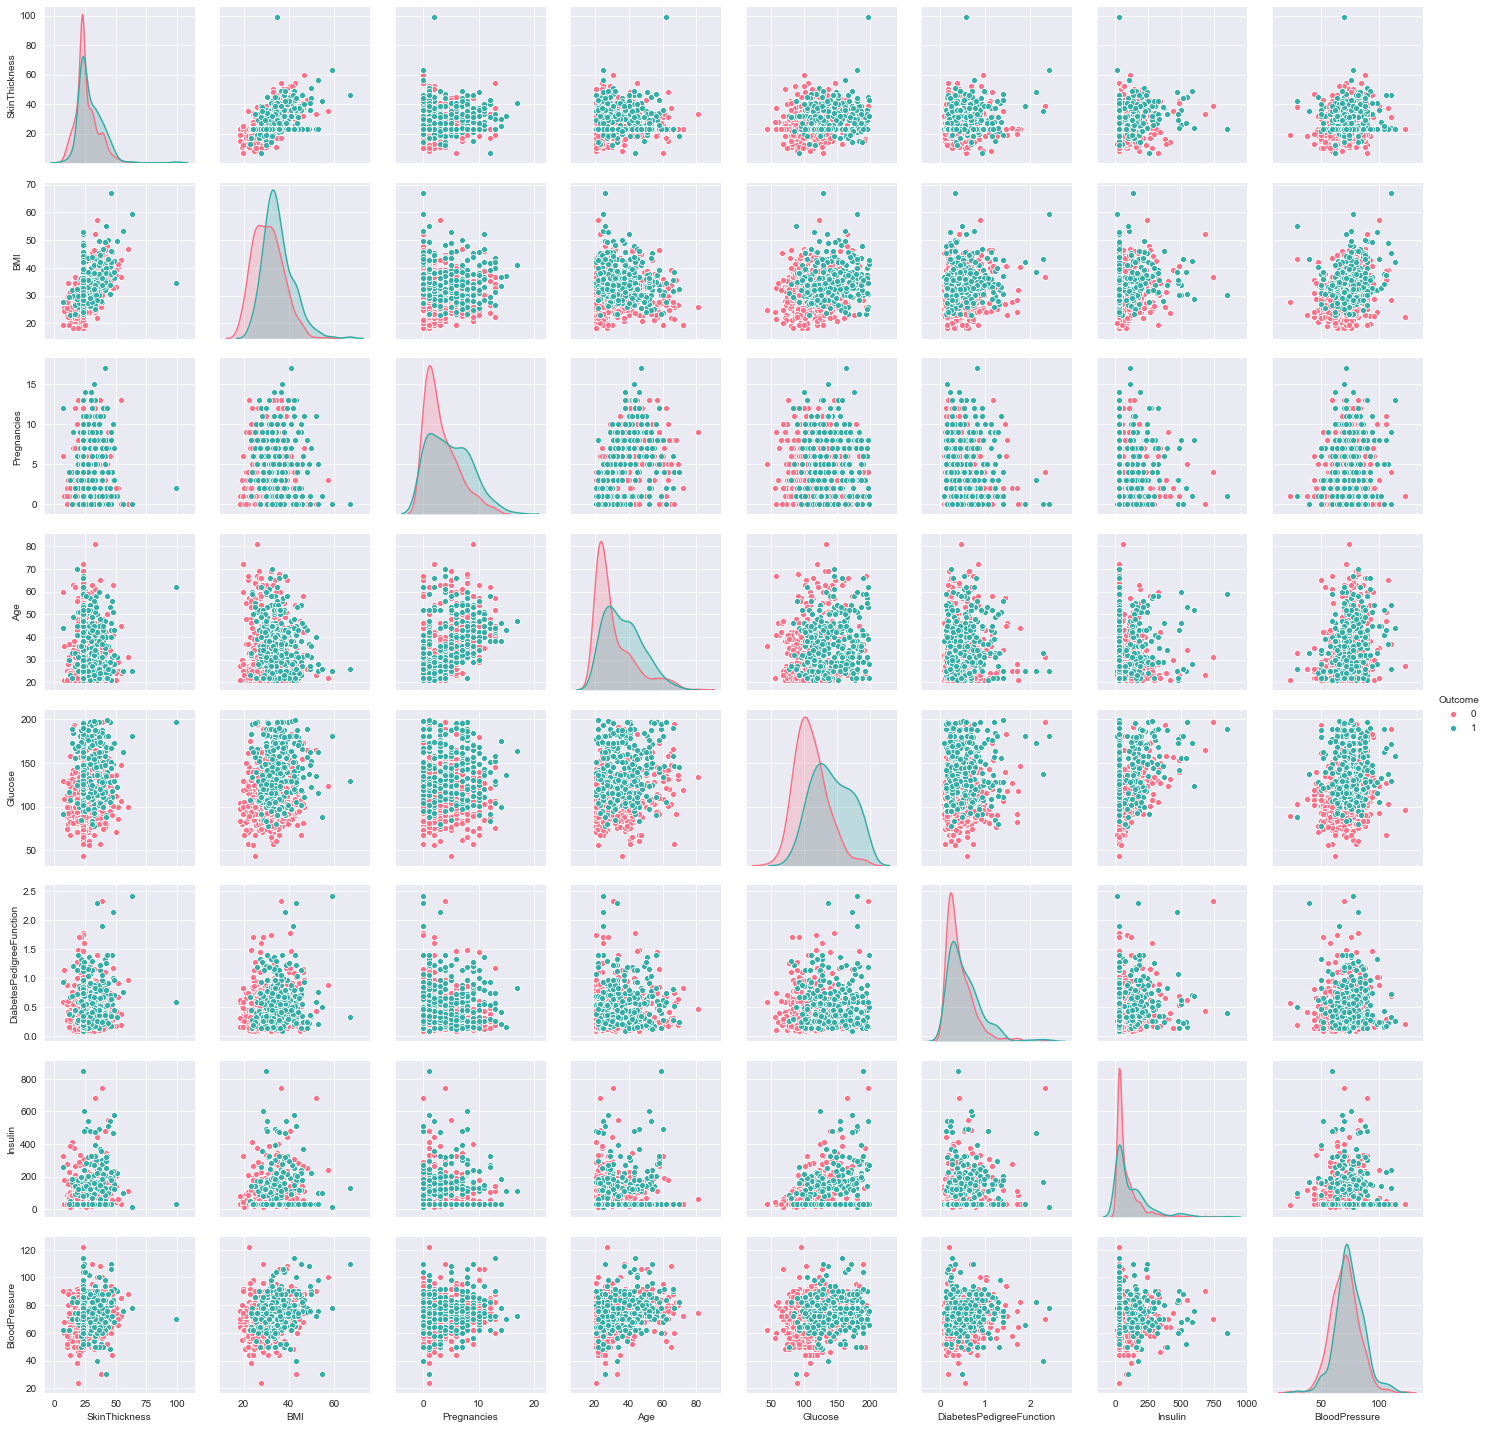

In [47]:
#Pairplot
ax=sns.pairplot(data,vars=['SkinThickness','BMI','Pregnancies','Age','Glucose','DiabetesPedigreeFunction','Insulin','BloodPressure'],hue='Outcome',palette='husl',diag_kind="kde",kind='scatter')

# Project Task 3:Data Modeling

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [48]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [49]:
#Separating X and Y variables
X=data.iloc[:,0:8].values
Y=data.iloc[:,8].values

In [50]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

# Logistic Regression

In [51]:
#Building models: Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
y_prediction=model.predict(X_test)
accuracy_logistic=metrics.accuracy_score(y_prediction,Y_test)
print('The accuracy of logistic regression is:',accuracy_logistic)

The accuracy of logistic regression is: 0.7083333333333334


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,model.predict(X))
cm

array([[450,  50],
       [131, 137]], dtype=int64)

In [53]:
#Sensitivity
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity:',sensitivity)

Sensitivity: 0.9


In [54]:
#Specificity
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity:',specificity)

Specificity: 0.5111940298507462


In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       500
           1       0.73      0.51      0.60       268

    accuracy                           0.76       768
   macro avg       0.75      0.71      0.72       768
weighted avg       0.76      0.76      0.75       768



AUC: 0.817


Text(0, 0.5, 'True Positive Rate')

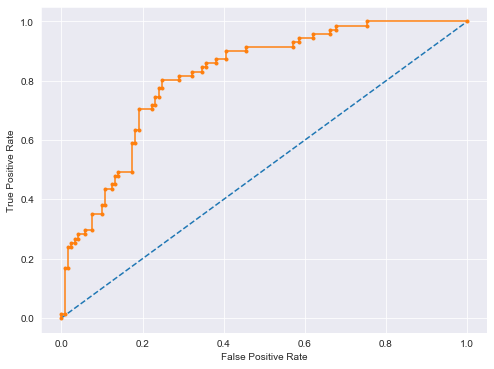

In [56]:
#Preparing ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
yhat=model.predict_proba(X_test)
#Keep probabilities for the positive outcomes only
yhat=yhat[:,1]
#calculate AUC
auc=roc_auc_score(Y_test,yhat)
print('AUC: %.3f' % auc)
#calculate roc curves
fpr,tpr,thresholds=roc_curve(Y_test,yhat)
fig=plt.gcf()
fig.set_size_inches(8,6)
# plot no skill
ax=plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
ax=plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# KNN

In [57]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_prediction=model.predict(X_test)
accuracy_knn=metrics.accuracy_score(y_prediction,Y_test)
print('The accuracy of KNN is:',accuracy_knn)

The accuracy of KNN is: 0.6770833333333334


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,model.predict(X))
cm

array([[433,  67],
       [ 82, 186]], dtype=int64)

In [59]:
#Sensitivity
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity:',sensitivity)

Sensitivity: 0.866


In [60]:
#Specificity
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity:',specificity)

Specificity: 0.6940298507462687


In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       500
           1       0.74      0.69      0.71       268

    accuracy                           0.81       768
   macro avg       0.79      0.78      0.78       768
weighted avg       0.80      0.81      0.80       768



AUC: 0.699


Text(0, 0.5, 'True Positive Rate')

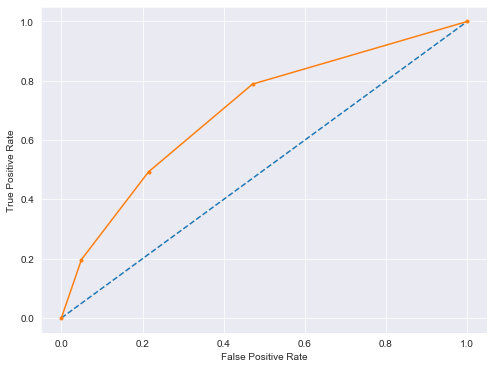

In [62]:
#Preparing ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
yhat=model.predict_proba(X_test)
#Keep probabilities for the positive outcomes only
yhat=yhat[:,1]
#calculate AUC
auc=roc_auc_score(Y_test,yhat)
print('AUC: %.3f' % auc)
#calculate roc curves
fpr,tpr,thresholds=roc_curve(Y_test,yhat)
fig=plt.gcf()
fig.set_size_inches(8,6)
# plot no skill
ax=plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
ax=plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Decision Tree Classifier

In [63]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_prediction=model.predict(X_test)
accuracy_DT=metrics.accuracy_score(y_prediction,Y_test)
print('The accuracy of DTC is:',accuracy_DT)

The accuracy of DTC is: 0.703125


In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,model.predict(X))
cm

array([[471,  29],
       [ 28, 240]], dtype=int64)

In [65]:
#Sensitivity
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity:',sensitivity)

Sensitivity: 0.942


In [66]:
#Specificity
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity:',specificity)

Specificity: 0.8955223880597015


In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       500
           1       0.89      0.90      0.89       268

    accuracy                           0.93       768
   macro avg       0.92      0.92      0.92       768
weighted avg       0.93      0.93      0.93       768



AUC: 0.683


Text(0, 0.5, 'True Positive Rate')

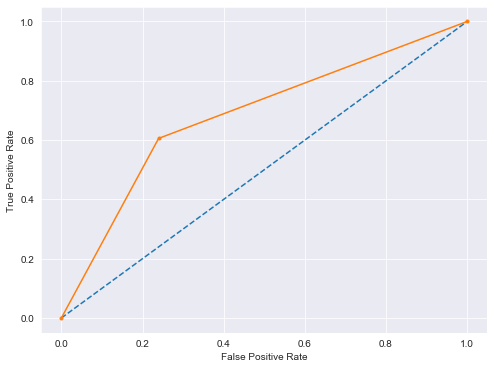

In [68]:
#Preparing ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
yhat=model.predict_proba(X_test)
#Keep probabilities for the positive outcomes only
yhat=yhat[:,1]
#calculate AUC
auc=roc_auc_score(Y_test,yhat)
print('AUC: %.3f' % auc)
#calculate roc curves
fpr,tpr,thresholds=roc_curve(Y_test,yhat)
fig=plt.gcf()
fig.set_size_inches(8,6)
# plot no skill
ax=plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
ax=plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.01,random_state=10)
model.fit(X_train,Y_train)
y_prediction=model.predict(X_test)
accuracy_GBC=metrics.accuracy_score(y_prediction,Y_test)
print('The accuracy of GBC is',accuracy_GBC)

The accuracy of GBC is 0.7135416666666666


In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y,model.predict(X))
cm

array([[481,  19],
       [149, 119]], dtype=int64)

In [71]:
#Sensitivity
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity:',sensitivity)

Sensitivity: 0.962


In [72]:
#Specificity
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity:',specificity)

Specificity: 0.44402985074626866


In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       500
           1       0.86      0.44      0.59       268

    accuracy                           0.78       768
   macro avg       0.81      0.70      0.72       768
weighted avg       0.80      0.78      0.76       768



AUC: 0.824


Text(0, 0.5, 'True Positive Rate')

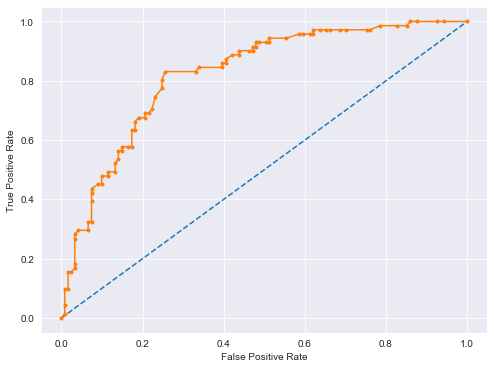

In [74]:
#Preparing ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
yhat=model.predict_proba(X_test)
#Keep probabilities for the positive outcomes only
yhat=yhat[:,1]
#calculate AUC
auc=roc_auc_score(Y_test,yhat)
print('AUC: %.3f' % auc)
#calculate roc curves
fpr,tpr,thresholds=roc_curve(Y_test,yhat)
fig=plt.gcf()
fig.set_size_inches(8,6)
# plot no skill
ax=plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
ax=plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [75]:
#Accuracy for the below algorithms:
Models=pd.DataFrame({'Algorithm':['Logistic Regression','KNN','DecisionTreeClassifier','GradientBoostingClassifier'],'Accuracy':[accuracy_logistic,accuracy_knn,accuracy_DT,accuracy_GBC]})
Models.sort_values(by='Accuracy',ascending=False)

,Algorithm,Accuracy
3,GradientBoostingClassifier,0.713542
0,Logistic Regression,0.708333
2,DecisionTreeClassifier,0.703125
1,KNN,0.677083


# Project Task: Week 4

 Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

For Tableau Dashboard [click here](https://public.tableau.com/profile/b.hemanth.kumar#!/vizhome/PGP-HealthcareCapstone/DiabetesReport?publish=yes" Tableau Dashboard")


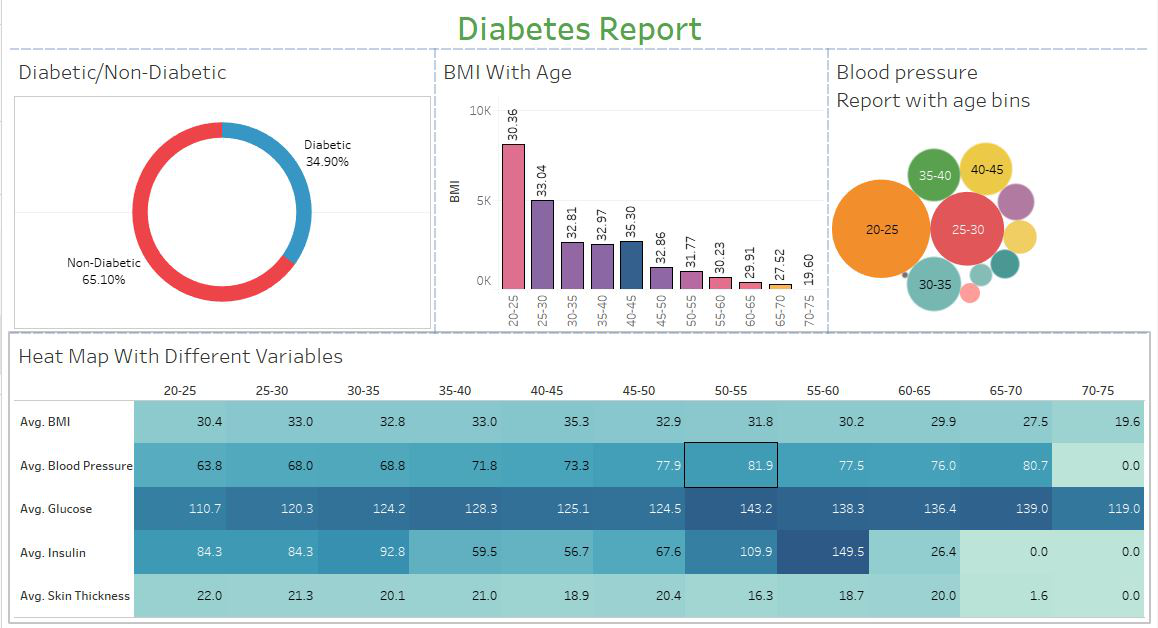

In [76]:
from PIL import Image as PILImage
import base64, io, IPython
image = PILImage.open('Diabetes Report.jpg') 
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)


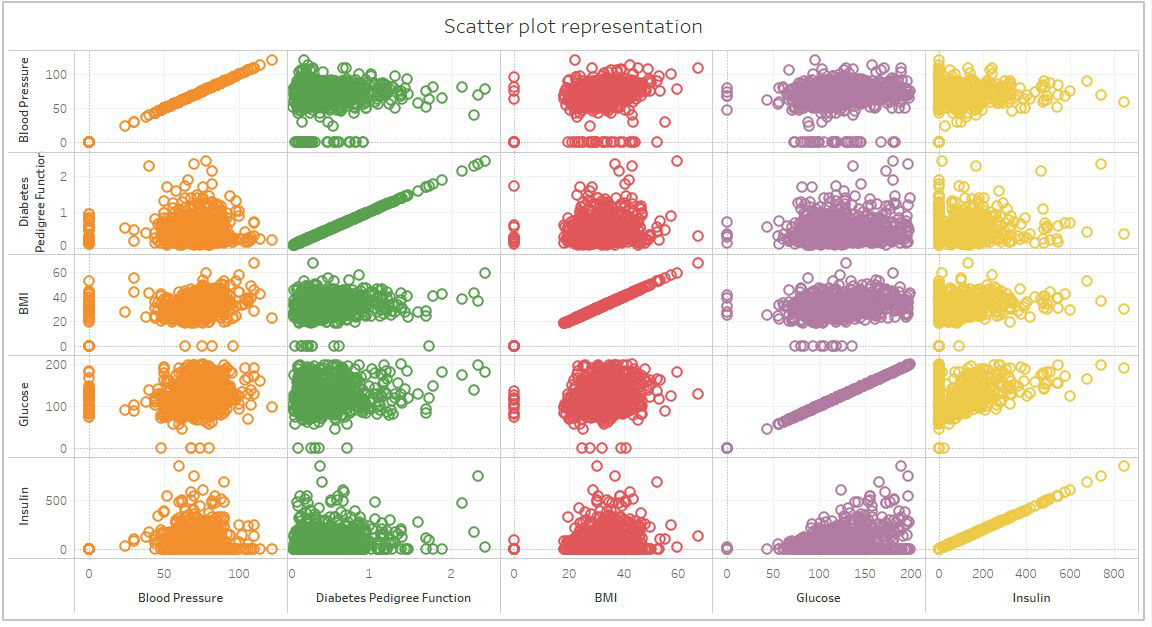

In [77]:
from PIL import Image as PILImage
import base64, io, IPython
image = PILImage.open('Scatter plot.jpg') 
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)


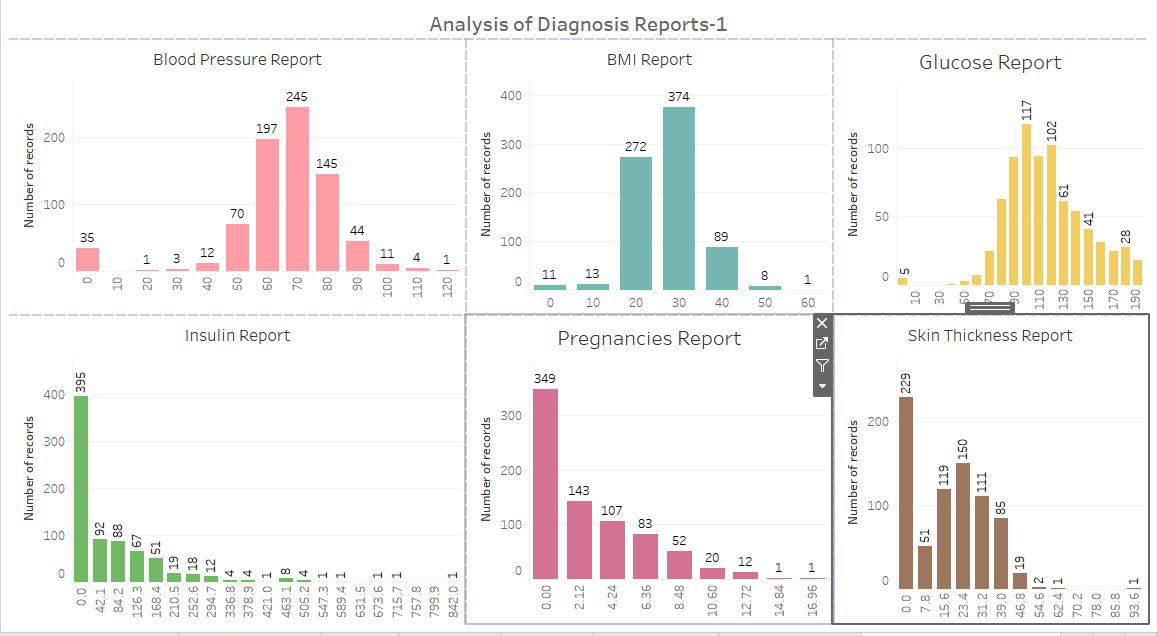

In [78]:
from PIL import Image as PILImage
import base64, io, IPython
image = PILImage.open('Analysis of diagnosis report-1.jpg') 
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)


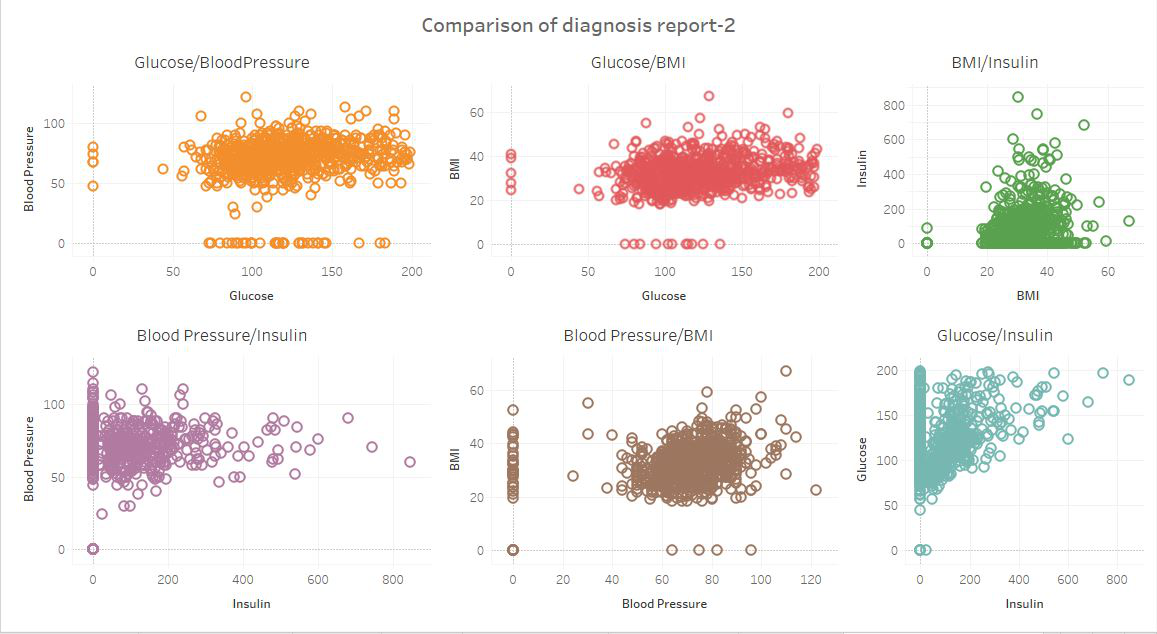

In [79]:
from PIL import Image as PILImage
import base64, io, IPython
image = PILImage.open('Analysis of diagnosis report-2.jpg') 
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()
html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)